# Data exploration

1. Exploration of Hornsea One bathymetric data.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# load Hornsea One Bathymetrics.csv with space seperated values
df = pd.read_csv('data/Hornsea One Bathymetrics.csv', sep=' ')

# log dataframe headers
print(df.columns)

print(min(df['Lat']), max(df['Lat']))
print(min(df['Lon']), max(df['Lon']))

Index(['Lat', 'Lon', 'Depth'], dtype='object')
53.7164048 53.9511514
1.598354 2.1440503


In [11]:
# mean data from surrounding area
print(df.iloc[0])
x = df.iloc[0]
x = [x['Lat'], x['Lon']]

print(
    df[(df['Lat'] >= x[0]-0.01) & (df['Lat'] <= x[0]+0.01) & (df['Lon'] >= x[1]-0.01) & (df['Lon'] <= x[1]+0.01)].Depth.mean()
)


Lat      53.735878
Lon       1.827780
Depth   -65.800000
Name: 0, dtype: float64
-51.35019920318715


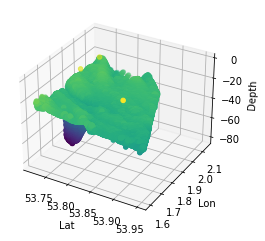

In [3]:
# plot Lat and Long and Depth, colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Lat'], df['Lon'], df['Depth'], c=df['Depth'], cmap='viridis')
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
ax.set_zlabel('Depth')
plt.show()


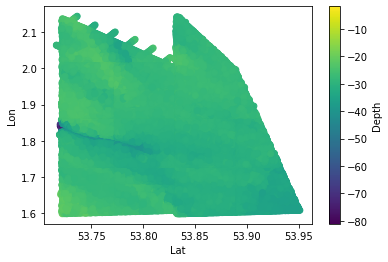

In [4]:
# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(df['Lat'], df['Lon'], c=df['Depth'], cmap='viridis')
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')
plt.show()

Exploration of 2020 velocity potential data, .995 sigma

In [3]:
from netCDF4 import Dataset
import numpy as np

In [6]:
file = 'data/2020 velocity potential .995 sigma/jan2020.nc' # mention the path to the downloaded file
data = Dataset(file, mode='r') # read the data 
print(data)
print(type(data)) # print the type of the data 
print(data.variables.keys()) # print the variables in the data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Composite Value
    history: Created via daily composite webtool at NOAA/ESRL PSD
    description: Computed from the web page http://www.esrl.noaa.gov/psd/data/composites/day/ NOAA/ESRL PSD
    platform: Model
    Conventions: COARDS
    dimensions(sizes): lon(192), lat(94), time(1)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 chi(time, lat, lon)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['lat', 'lon', 'time', 'chi'])


In [7]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]-180.0
chi = data.variables['chi'][::]

longs, lats = np.meshgrid(lon,lat)  #this converts coordinates into 2D array
air = np.squeeze(chi[0,:,:])

longs, lats = longs[0], lats[0]

print(f"longs shape: {longs.shape}, lats shape: {lats.shape}, chi shape: {chi.shape}")


longs shape: (192,), lats shape: (192,), chi shape: (1, 94, 192)


In [8]:
mp = Basemap()

longs, lats = np.meshgrid(lon,lat)  #this converts coordinates into 2D array

x,y = mp(longs,lats) #mapping them together 
plt.figure(figsize=(6,8)) #figure size 
c_scheme = mp.pcolor(longs, lats, np.squeeze(chi[0,:,:]), cmap = 'jet') # [0,:,:] is for the first day of the year

# consider this as the outline for the map that is to be created 
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
plt.show()

NameError: name 'Basemap' is not defined

Exploration of UK wind data.
(data/wind_test_data.nc)

In [4]:
from mpl_toolkits.basemap import Basemap

In [10]:
file = 'data/2020 velocity potential .995 sigma/jan2020.nc' # mention the path to the downloaded file
data = Dataset(file, mode='r') # read the data 
print(data)
print(type(data)) # print the type of the data 
print(data.variables.keys()) # print the variables in the data


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Composite Value
    history: Created via daily composite webtool at NOAA/ESRL PSD
    description: Computed from the web page http://www.esrl.noaa.gov/psd/data/composites/day/ NOAA/ESRL PSD
    platform: Model
    Conventions: COARDS
    dimensions(sizes): lon(192), lat(94), time(1)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 chi(time, lat, lon)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['lat', 'lon', 'time', 'chi'])


In [11]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]-180.0
air = data.variables['chi'][::][0,:,:]

air = np.squeeze(air)
longs, lats = np.meshgrid(lon,lat)  #this converts coordinates into 2D array
print(longs, lats)

print(longs.shape, lats.shape, air.shape)

[[-180.    -178.125 -176.25  ...  174.375  176.25   178.125]
 [-180.    -178.125 -176.25  ...  174.375  176.25   178.125]
 [-180.    -178.125 -176.25  ...  174.375  176.25   178.125]
 ...
 [-180.    -178.125 -176.25  ...  174.375  176.25   178.125]
 [-180.    -178.125 -176.25  ...  174.375  176.25   178.125]
 [-180.    -178.125 -176.25  ...  174.375  176.25   178.125]] [[ 88.542   88.542   88.542  ...  88.542   88.542   88.542 ]
 [ 86.6531  86.6531  86.6531 ...  86.6531  86.6531  86.6531]
 [ 84.7532  84.7532  84.7532 ...  84.7532  84.7532  84.7532]
 ...
 [-84.7532 -84.7532 -84.7532 ... -84.7532 -84.7532 -84.7532]
 [-86.6531 -86.6531 -86.6531 ... -86.6531 -86.6531 -86.6531]
 [-88.542  -88.542  -88.542  ... -88.542  -88.542  -88.542 ]]
(94, 192) (94, 192) (94, 192)


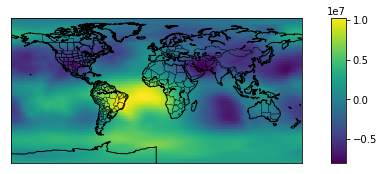

In [13]:
mp = Basemap()

longs, lats = np.meshgrid(lon,lat)  #this converts coordinates into 2D array

x,y = mp(longs,lats) #mapping them together 
plt.figure(figsize=(6,8)) #figure size 
c_scheme = mp.pcolor(longs, lats, air, cmap = 'viridis') # [0,:,:] is for the first day of the year

# consider this as the outline for the map that is to be created 
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
plt.show()

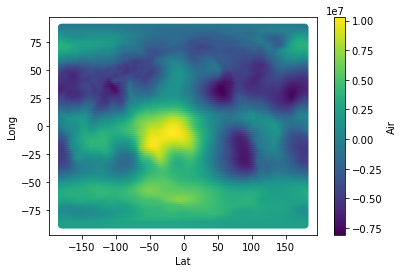

In [16]:
# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(longs, lats, c=air, cmap='viridis')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Air')
plt.show()


Explore wind .csv data


In [ ]:
file = 'data/2020 velocity potential .995 sigma.csv'
df = pd.read_csv(file, sep=',')

df[['Lon']] = df[['Lon']]-180.0
x = df[['Lat','Lon']]
y = df[['Chi']]

            Lat     Lon           Chi
0      -180.000  88.542  8.793355e+05
1      -178.125  88.542  8.861382e+05
2      -176.250  88.542  8.930286e+05
3      -174.375  88.542  9.000002e+05
4      -172.500  88.542  9.070461e+05
...         ...     ...           ...
216571  170.625 -88.542 -5.616578e+06
216572  172.500 -88.542 -5.635228e+06
216573  174.375 -88.542 -5.653387e+06
216574  176.250 -88.542 -5.671028e+06
216575  178.125 -88.542 -5.688122e+06

[216576 rows x 3 columns]


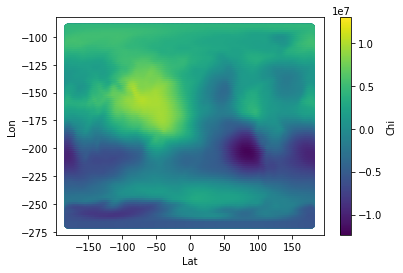

In [ ]:
# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(df['Lat'], df['Lon'], c=df['Chi'], cmap='viridis')
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Chi')
plt.show()

Explore east coast bathymetry data.

In [5]:
# import polygon from shapely
from shapely.geometry import Polygon

# import PolygonPatch from descartes
from descartes import PolygonPatch
import pylab as pl

In [6]:
df = pd.read_csv('data/admiralty bathymetry UK east coast.csv')

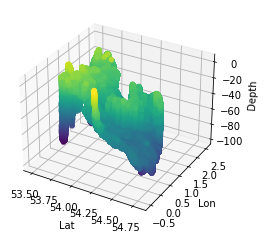

In [4]:
# plot Lat and Long and Depth, colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Lat'], df['Lon'], df['Depth'], c=df['Depth'], cmap='viridis')
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
ax.set_zlabel('Depth')
plt.show()

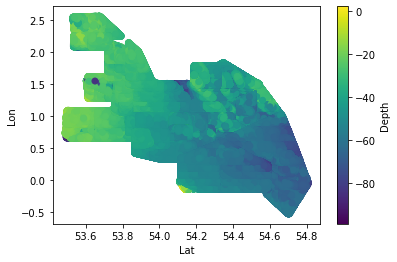

In [5]:
# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(df['Lat'], df['Lon'], c=df['Depth'], cmap='viridis')
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')
plt.show()

c:\Users\zacha\miniconda3\envs\py10\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


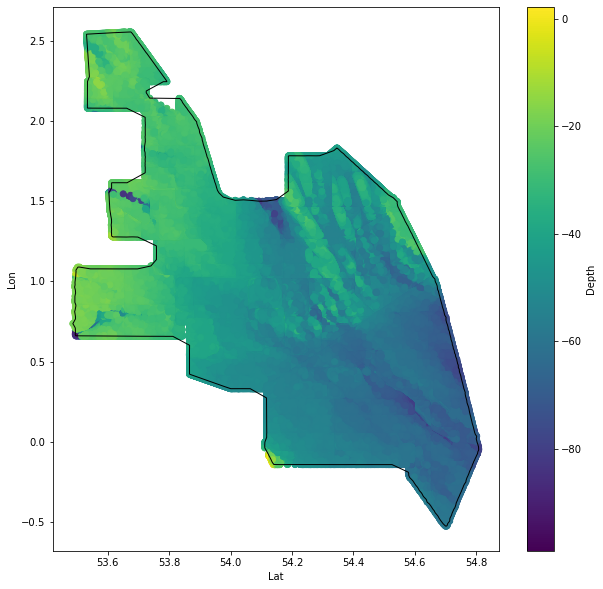

In [7]:
# load UK east coast edge points alpha 17.5.csv
edges = pd.read_csv('data/UK east coast edge points alpha 17.5.csv')

poly = Polygon(edges.to_numpy())

# plot Lat and Long colored by Depth
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)

map = ax.scatter(df['Lat'], df['Lon'], c=df['Depth'], cmap='viridis')

patch = PolygonPatch(poly, fc='#999999', ec='#000000', fill=False)
ax.add_patch(patch)

ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

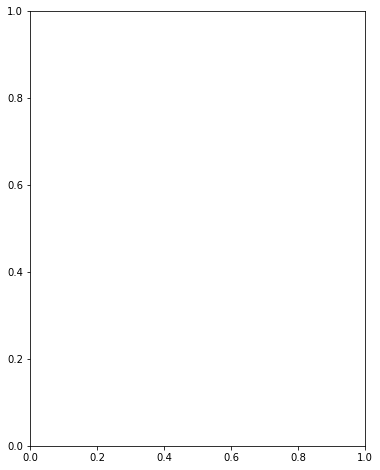

In [10]:
mp = Basemap()

#longs, lats = np.meshgrid()  #this converts coordinates into 2D array

#x,y = mp(longs,lats) #mapping them together 
plt.figure(figsize=(6,8)) #figure size 
c_scheme = mp.pcolor(df['Lon'], df['Lat'], df['Depth'], cmap = 'viridis') # [0,:,:] is for the first day of the year

# consider this as the outline for the map that is to be created 
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
plt.show()